<a href="https://colab.research.google.com/github/Satyam1018/ML_Classification---HEALTH_INSURANCE_CROSS_SELL_PREDICTION/blob/main/ML_Classification_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction



## **Project Type**    - Classification
## **Contribution**    - Individual
## **Name**            - Satyam Ojha
## **Batch**           - Cohort Delhi

# **Project Summary -**

The "Health Insurance Cross-Sell Prediction" project aims to revolutionize the marketing strategies of a health insurance provider by leveraging advanced predictive modeling techniques. In an era where personalized customer engagement is key, understanding and predicting customer behavior is crucial for the success of any insurance business. This project focuses on developing a robust predictive model to identify potential customers who are more likely to be interested in purchasing health insurance products, thereby enhancing cross-selling opportunities and improving overall business performance.

The primary objective of this project is to build a binary classification model that accurately predicts whether a customer is likely to purchase health insurance or not. By achieving this, the model can assist the insurance provider in tailoring their marketing strategies and resources towards individuals who exhibit a higher likelihood of converting into health insurance customers. Additionally, the project aims to uncover key customer segments, identify influential features, and optimize model performance to ensure reliable predictions.



# **GitHub Link -**

https://github.com/Satyam1018/ML_Classification---HEALTH_INSURANCE_CROSS_SELL_PREDICTION

# **Problem Statement**


**The health insurance industry faces the ongoing challenge of effectively identifying and targeting potential customers for cross-selling health insurance products. In order to optimize marketing strategies and enhance business performance, there is a need for a robust predictive model that can accurately predict whether a customer is likely to purchase health insurance.**

**The available "Health Insurance Cross-Sell Prediction" dataset provides valuable information about customers, including demographic details, historical interactions, and behavioral patterns. The goal is to leverage this dataset to develop a predictive model that can identify individuals with a higher likelihood of showing interest in health insurance, thereby improving the efficiency of cross-selling campaigns..**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [88]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import datetime as dt


import lightgbm

# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier



from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold



# Importing metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import class_likelihood_ratios,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.metrics import classification_report

### Dataset Loading

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
dataset = '/content/drive/MyDrive/DataSets_Almabetter/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
insurance_df = pd.read_csv(dataset)

### Dataset First View

In [91]:
insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [92]:
insurance_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [93]:
insurance_df.shape

(381109, 12)

### Dataset Information

In [94]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [95]:
insurance_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

#### Duplicate Values

In [96]:
insurance_df.duplicated().sum()

0

#### Missing Values/Null Values

In [97]:
insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

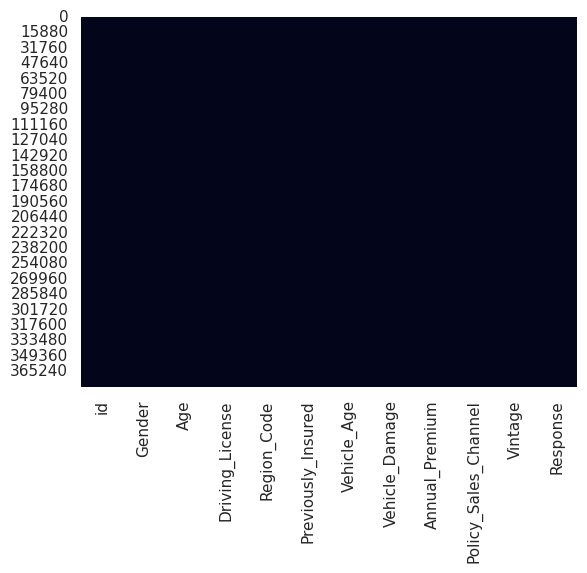

In [98]:
sns.heatmap(insurance_df.isnull(), cbar = False)

<function matplotlib.pyplot.show(close=None, block=None)>

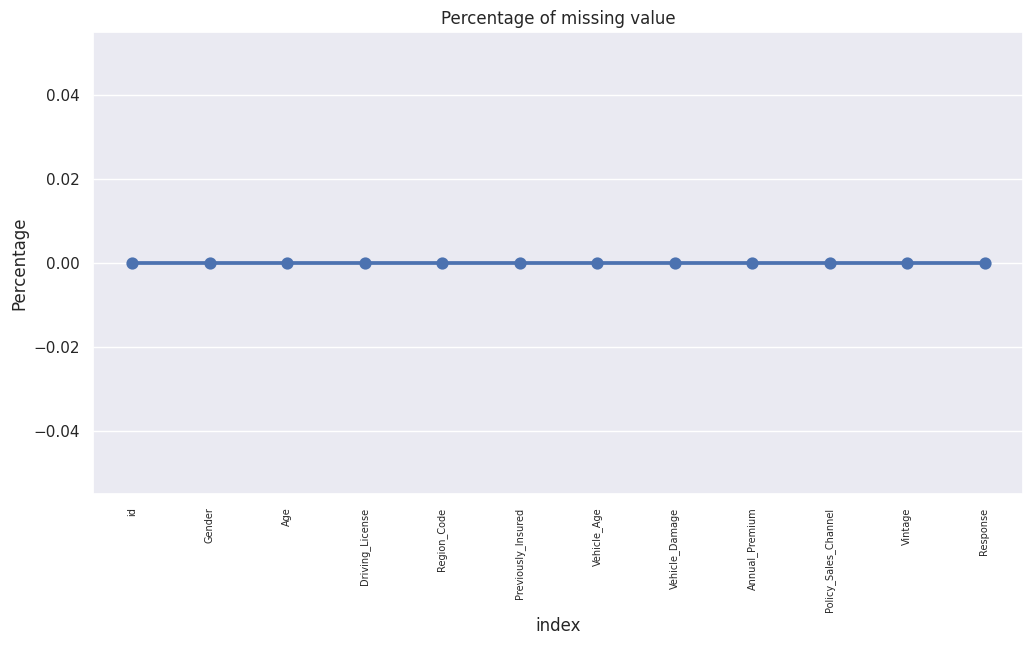

In [99]:
missing_val = pd.DataFrame(insurance_df.isnull().sum()*100/insurance_df.shape[0]).reset_index()
plt.figure(figsize = (12,6))
xa = sns.pointplot(x = 'index', y = 0, data = missing_val)
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Percentage of missing value')
plt.ylabel('Percentage')
plt.show

### What did you know about your dataset?

* Dataset do not have any duplicate value .
* Dataset do not have any null value.

## ***2. Understanding Your Variables***

In [100]:
# Dataset Columns
insurance_df.columns.to_list()

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [101]:
# Dataset Describe
insurance_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

* **Id -** Unique Id for each row.
* **Gender -** Gender of the customer.
* **Age -** Age of the customer.
* **Driving_License -** Whether the customer holds a valid driving license.
* **Region_Code -** Geographic location or region code of the customer.
* **Previously_Insured -** Person has previously taken insurance ever or not.
* **Vehicle_Age -**Age of the customer's vehicle.
* **Vehicle_Damage -** Whether the customer's vehicle has been damaged before.
* **Annual_Premium -** Whether the customer was previously insured with another provider.
* **Policy_Sales_Channel -** The channel or method through which the policy was sold.
* **Vintage	-** Number of days since the customer joined.
* **Response**  Whether the customer opted for the cross-sell (1 for YES, 0 for NO)

### Check Unique Values for each variable.

In [102]:
insurance_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### **Create a New Column**

In [103]:
insurance_df['Age_Group'] = insurance_df['Age'].apply(lambda x:'Young_Age' if x >= 20 and x <=40 else 'Middle_Age' if x > 40 and x <= 60 else 'Old_Age')

### **Final View of Dataset**

df_desc = []
for column in insurance_df.columns:
  df_desc.append([column,
                  insurance_df[column].dtypes,
                  insurance_df[column].isnull().sum(),
                  round(insurance_df[column].isnull().sum()/len(insurance_df)*100, 2),
                  insurance_df[column].nunique(),
                  insurance_df[column].unique()])

## storing all the information in a single table just to keep it neat
column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **1. Target Variable**

<Axes: xlabel='Response', ylabel='count'>

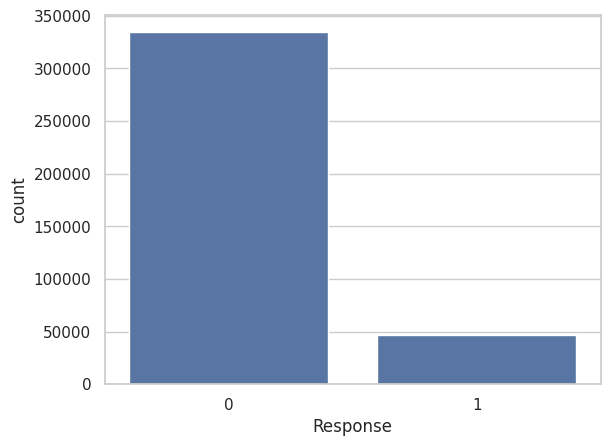

In [104]:
sns.set_theme(style = "whitegrid")
sns.countplot(x='Response', data = insurance_df)


* Afrer visualize the dataset colusion is dataset is highly imbalanced.

#### **2. Gender**

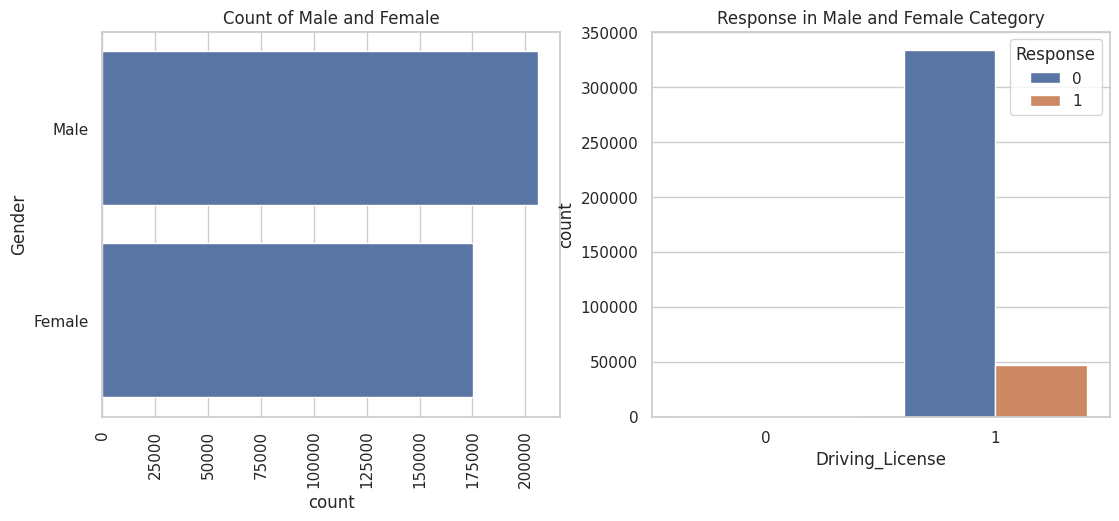

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
sns.countplot(insurance_df['Gender'])
plt.xticks(rotation=90)
plt.title("Count of Male and Female")

plt.subplot(1, 2, 2)
sns.countplot(x='Driving_License', data=insurance_df, hue = 'Response')
sns.set_theme()
plt.title("Response in Male and Female Category")

# Show the plot
plt.show()


#### **3. Age_Group vs Response**

<Axes: xlabel='Age_Group', ylabel='count'>

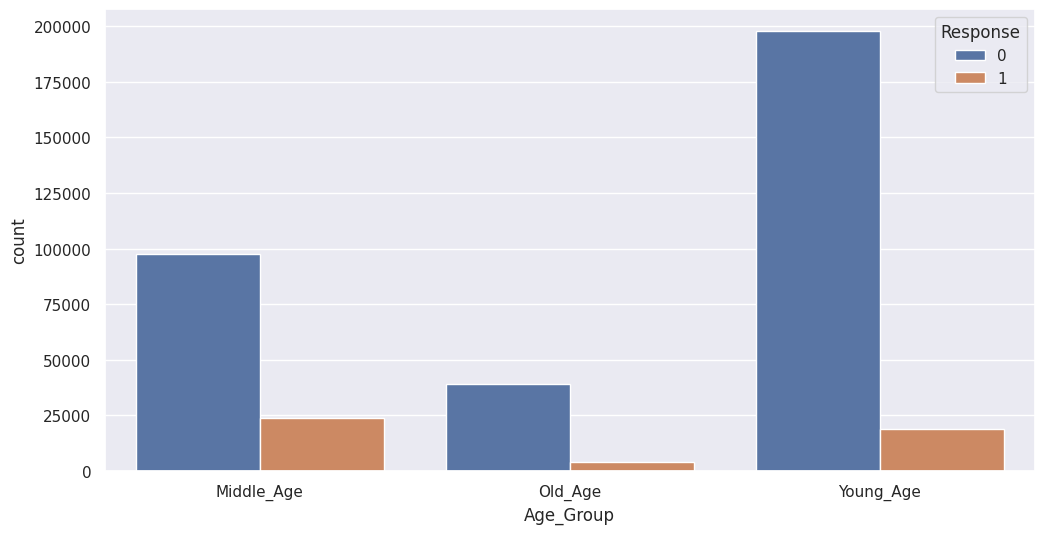

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age_Group',hue='Response',data=insurance_df)

<Axes: xlabel='Age', ylabel='count'>

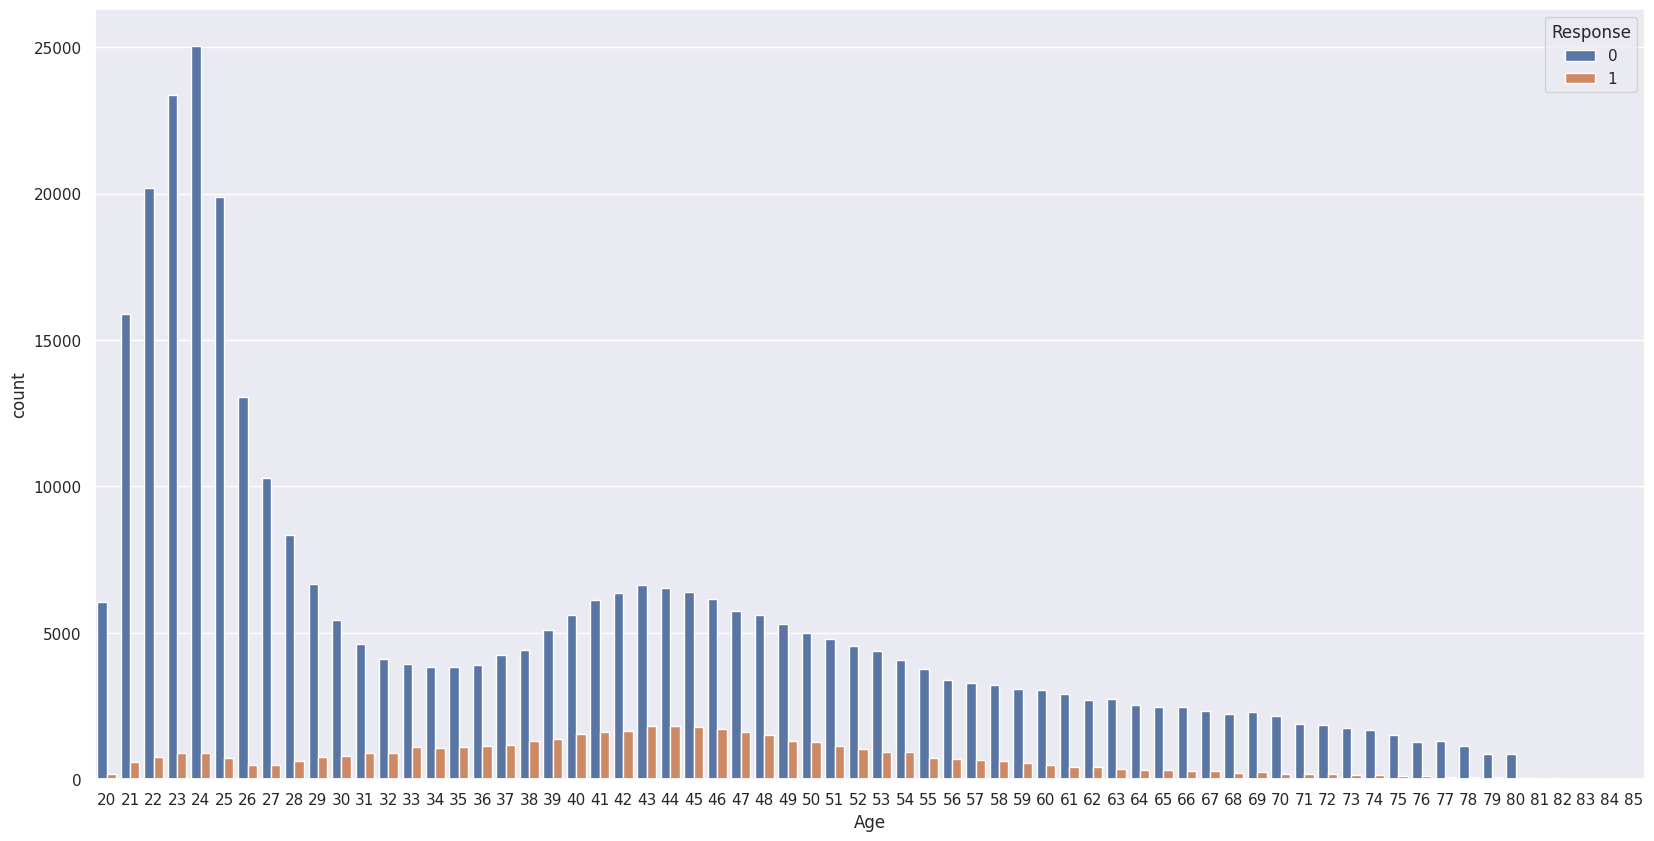

In [107]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=insurance_df)

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.
* From the boxplot we can see that there no outlier in the data.

#### **4. Driving_License**

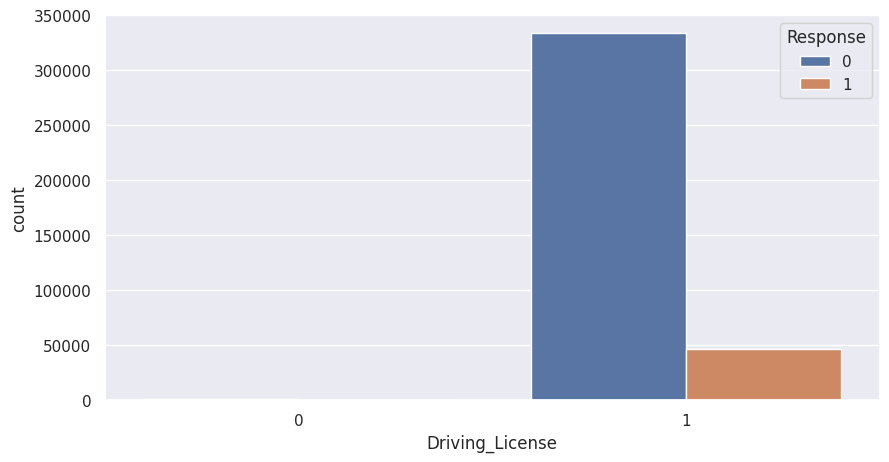

In [108]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Driving_License', data=insurance_df, hue = 'Response')
sns.set_theme()
plt.show()

* Customers who are interested in Vehicle Insurance almost all have driving license.

#### **5. Previously_Insured vs Response**

<Axes: xlabel='Previously_Insured', ylabel='count'>

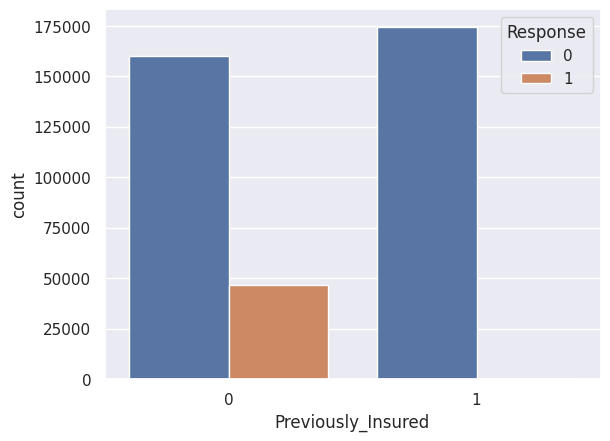

In [109]:
sns.countplot(x='Previously_Insured',hue='Response',data=insurance_df)

* Customer who are not perviosly insured are likely to be inetrested.

#### **6. Vehicle_Age vs Response**

<Axes: xlabel='Vehicle_Age', ylabel='count'>

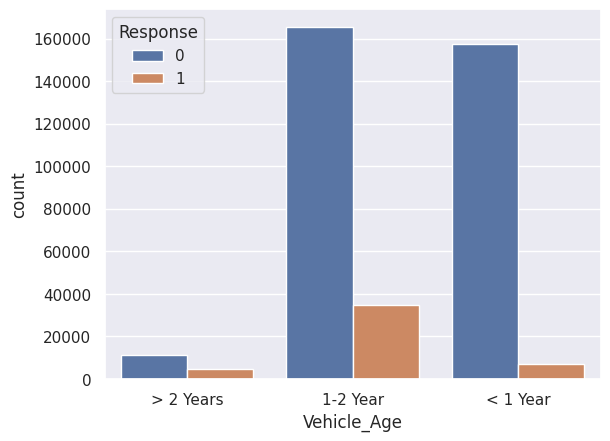

In [110]:
sns.countplot(x='Vehicle_Age',hue='Response',data=insurance_df)

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two.

* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance.

#### **7. Region_Code**

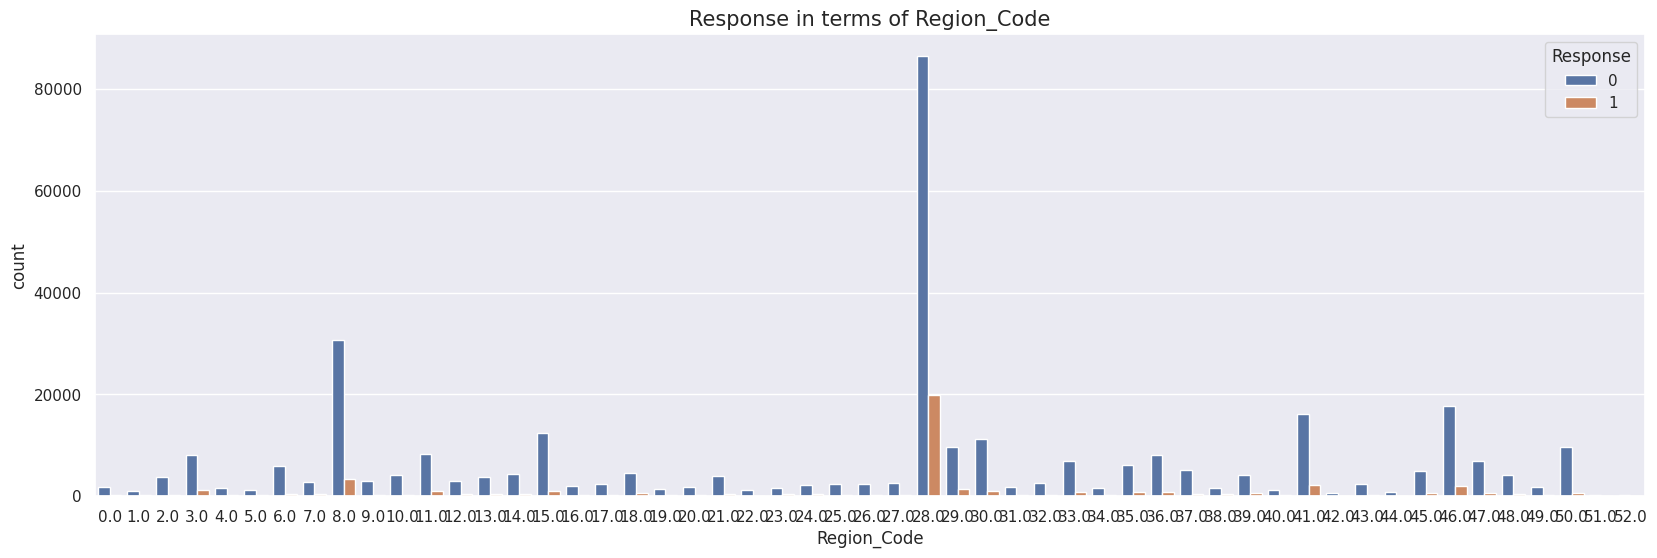

In [111]:
plt.figure(figsize = (20,6))
sns.countplot(x='Region_Code', hue='Response', data=insurance_df)
plt.title('Response in terms of Region_Code', fontsize=15)
plt.show()

* Region Code - 0.28 has the highest numbers of customers.

#### **8. Annual_Premium**

<ipython-input-112-e58603a99745>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Annual_Premium'], color='green')


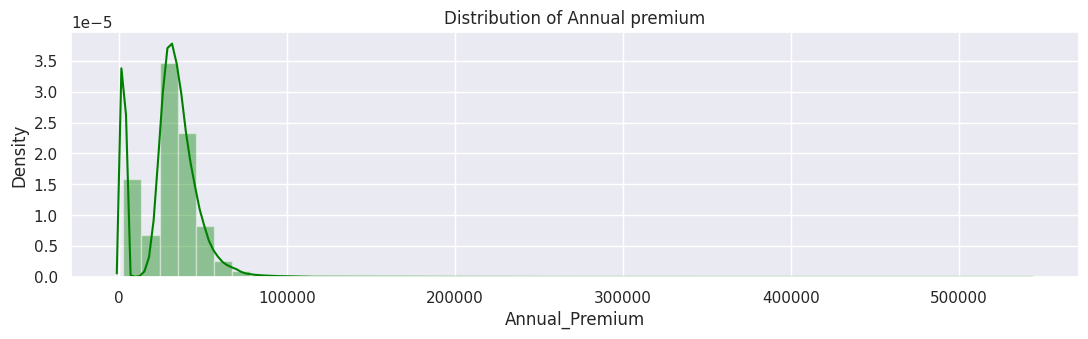

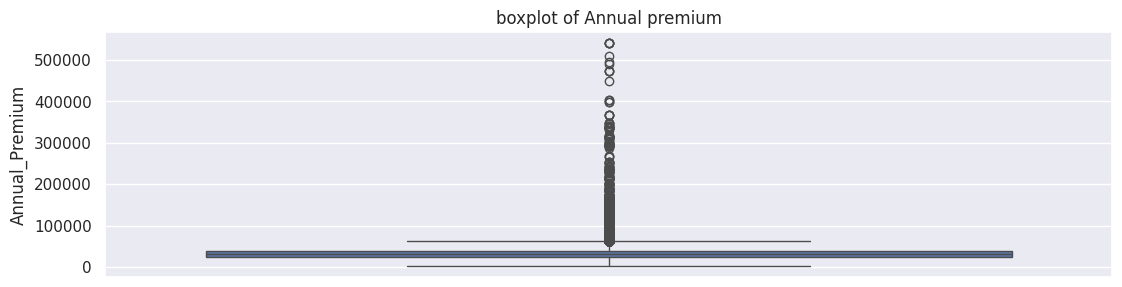

In [112]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(insurance_df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(insurance_df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

* From the distribution plot we can infer that the annual premimum variable is right skewed.
* From the boxplot we can observe lot of outliers in the variable.

#### **9. Distribution of data in Features**

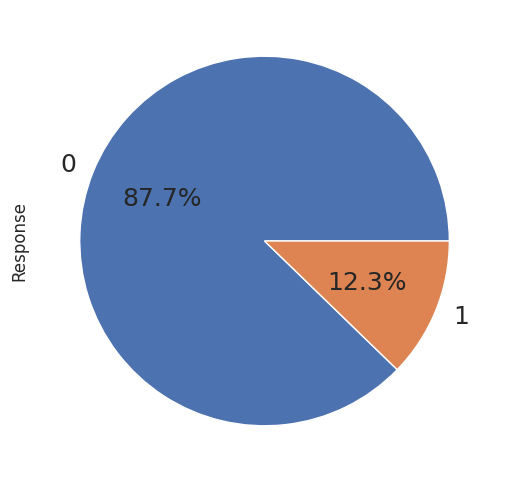

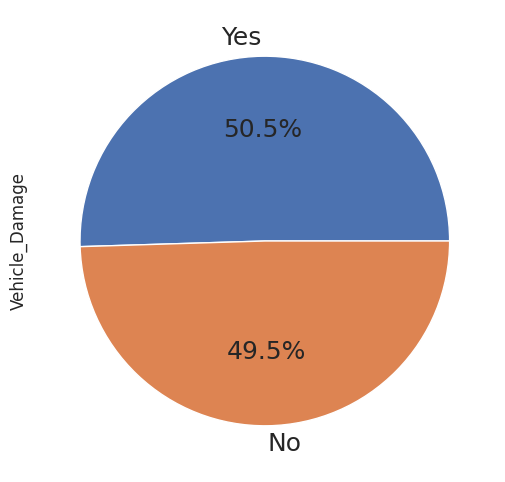

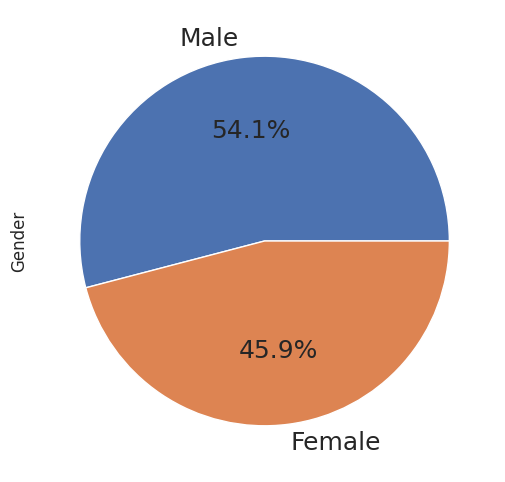

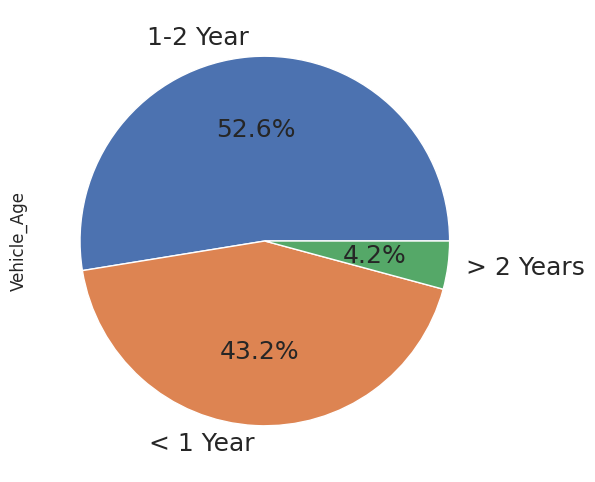

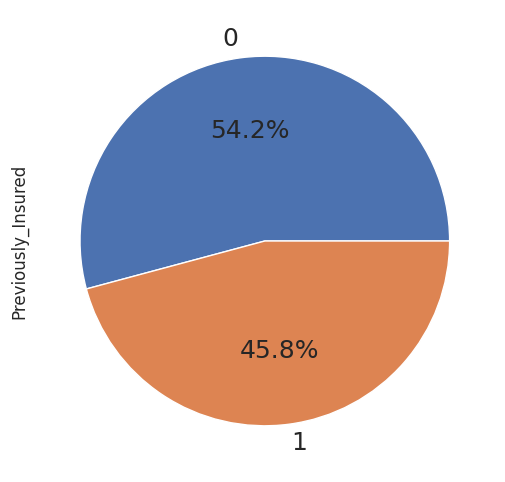

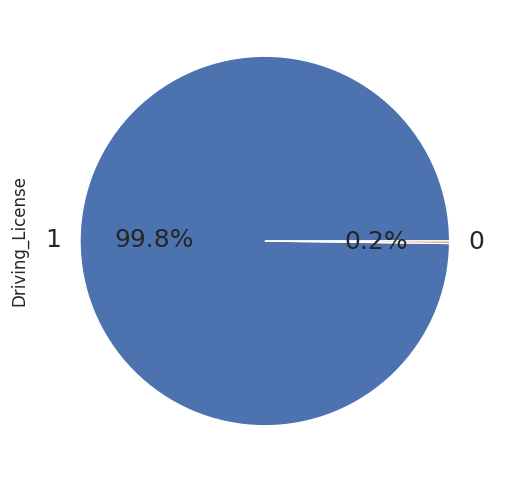

In [113]:
# percentage of features
df_box = insurance_df[['Response', 'Vehicle_Damage', 'Gender','Vehicle_Age','Previously_Insured','Driving_License']]

for column in df_box :
    percent = insurance_df[column].value_counts()
    percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(8,6),textprops={'fontsize': 15})
    plt.show()

* 54.1% of customers are male and 45.9% of customers are female.
* Most of the customers are young people.
* 99.8% of customers have driving licence.
* 45.8% of customers are Previously_Insured.
* 52.6 percent of consumers have vehicles that are between 1-2 years old.
* Number of customers with car damage and those without are nearly equal.
* 87.7% of Customer are not interested in purchasing vehicle insurance.

#### **10. Skewness of features**

<ipython-input-114-149405856ff0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Age']);


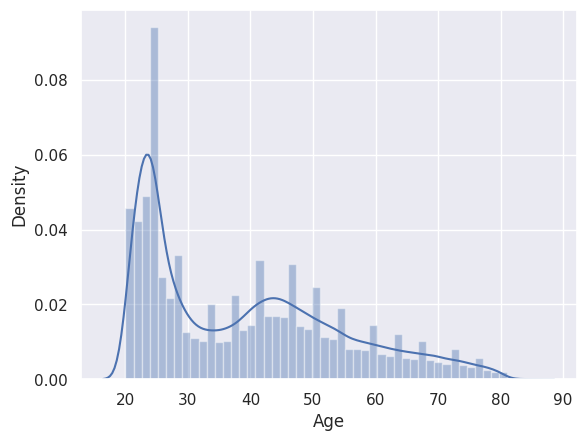

<ipython-input-114-149405856ff0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Response']);


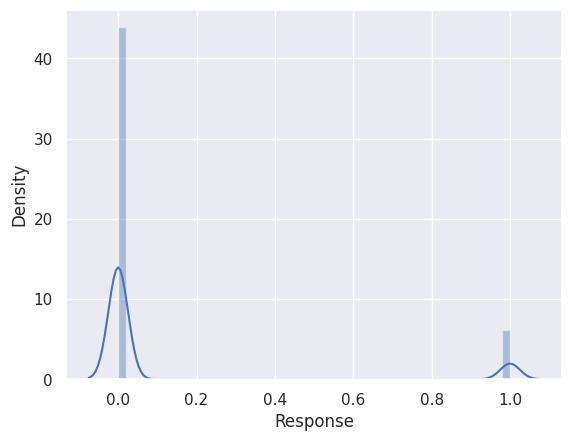

<ipython-input-114-149405856ff0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Annual_Premium']);


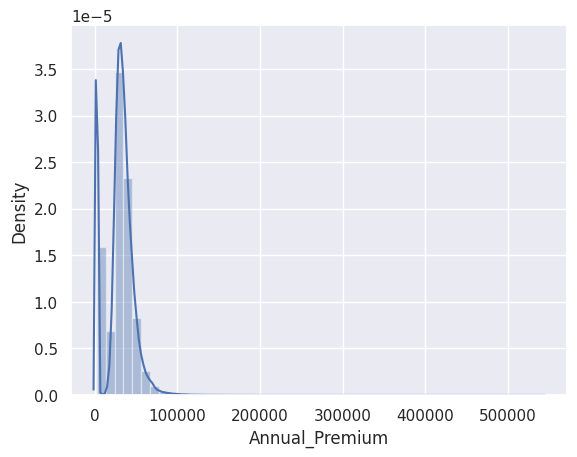

<ipython-input-114-149405856ff0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Region_Code']);


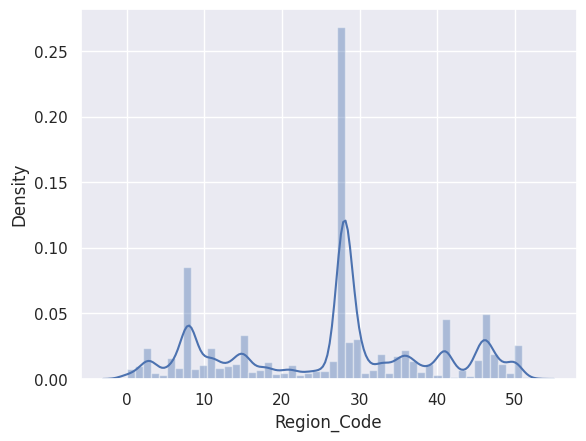

<ipython-input-114-149405856ff0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Policy_Sales_Channel']);


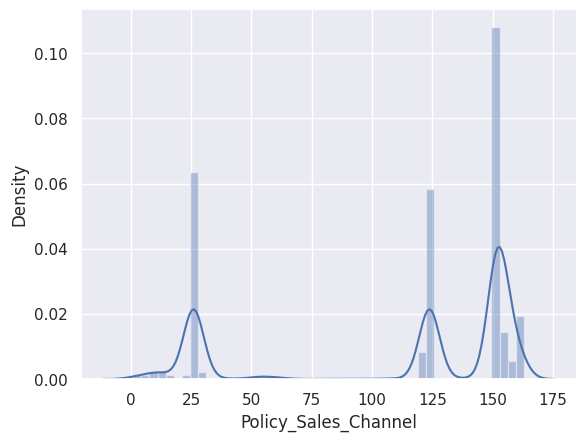

<ipython-input-114-149405856ff0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Vintage']);


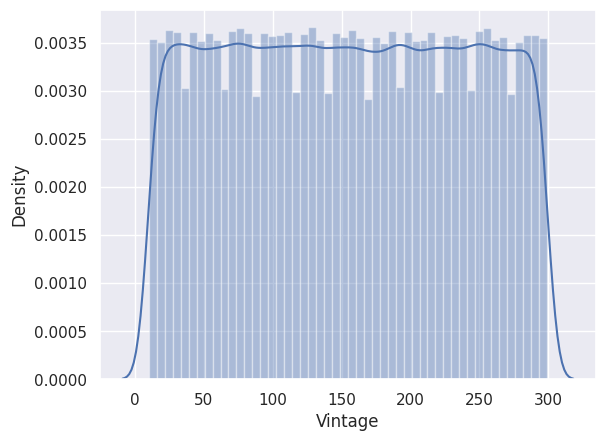

In [114]:
# Displot of datasets
sns.distplot(insurance_df['Age']);
plt.show()
sns.distplot(insurance_df['Response']);
plt.show()
sns.distplot(insurance_df['Annual_Premium']);
plt.show()
sns.distplot(insurance_df['Region_Code']);
plt.show()
sns.distplot(insurance_df['Policy_Sales_Channel']);
plt.show()
sns.distplot(insurance_df['Vintage']);
plt.show()

* From the above plot it can be implied that Annual Premium has a poitively skewed distribution.
* From above we can also depict that Vintage has a approximatly uniform distribution. Age is positively skewed.

* We have to change Annual_Premium's distribution. It an cause overfitting.

#### **11. Finding Outliers**

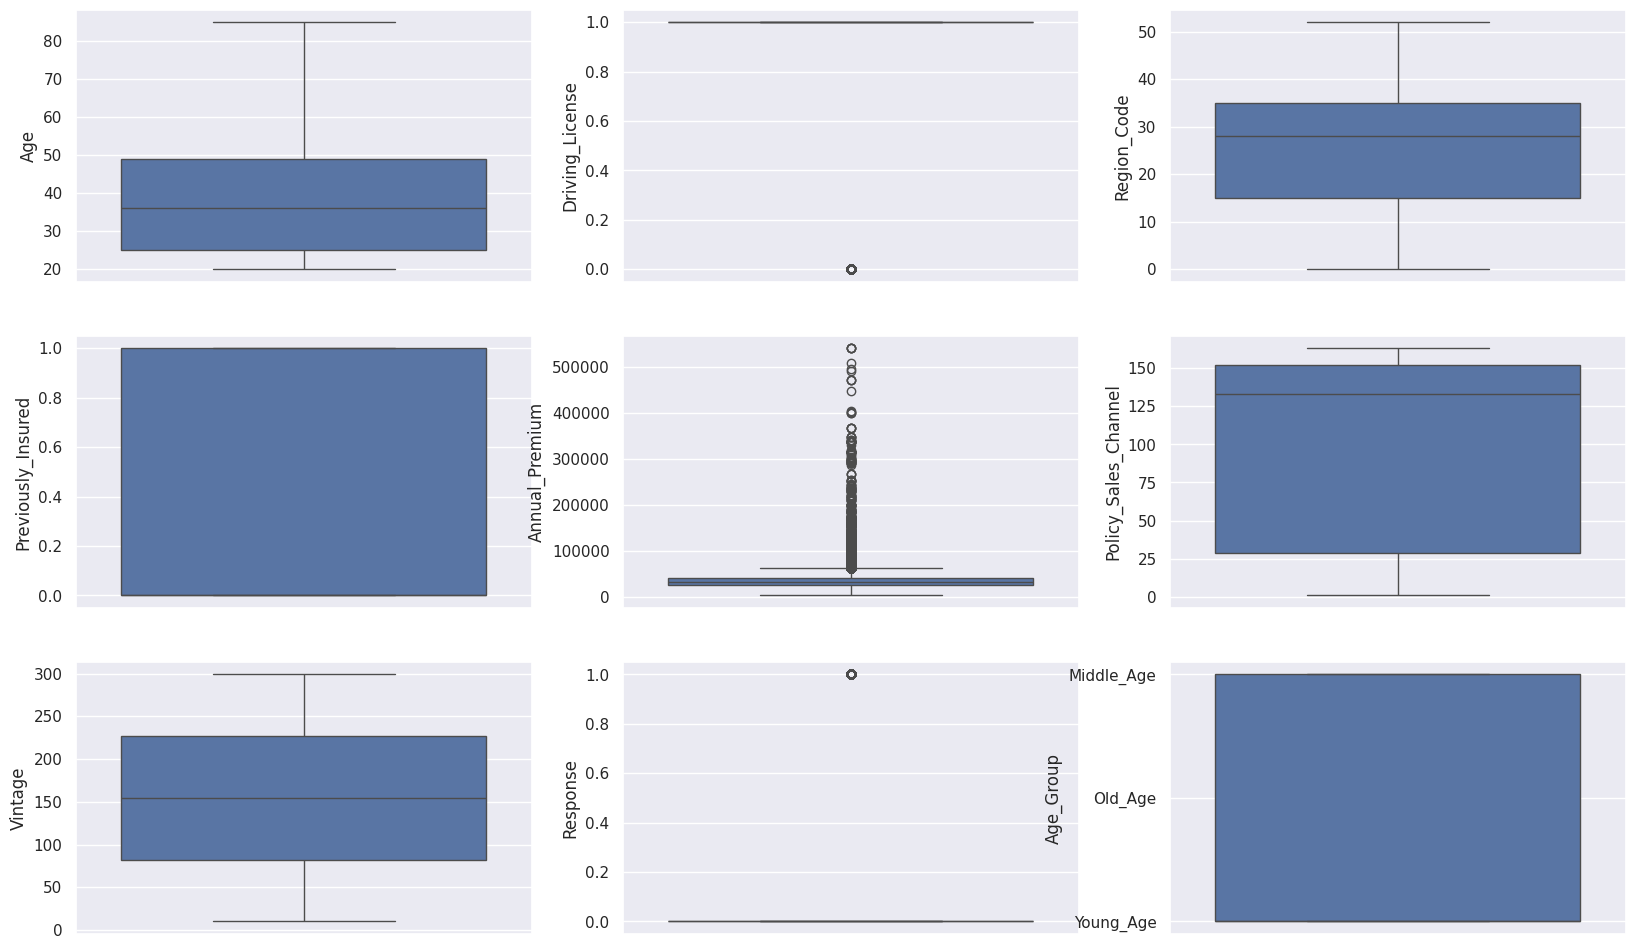

In [115]:
# checking outliers by using boxplot and droping object features
df_box = insurance_df.drop(columns = ['id', 'Vehicle_Damage', 'Gender','Vehicle_Age'])

plt.figure(figsize = (20, 12))
n = 1
for column in df_box :
    plt.subplot(3,3,n)
    sns.boxplot(insurance_df[column])
    n += 1

* Used boxplot() to see outliers in our Data. This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.
*There's many outliers in the annual premium columns.

#### **12. Heatmap**

<ipython-input-116-e77889093c5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = insurance_df.corr()


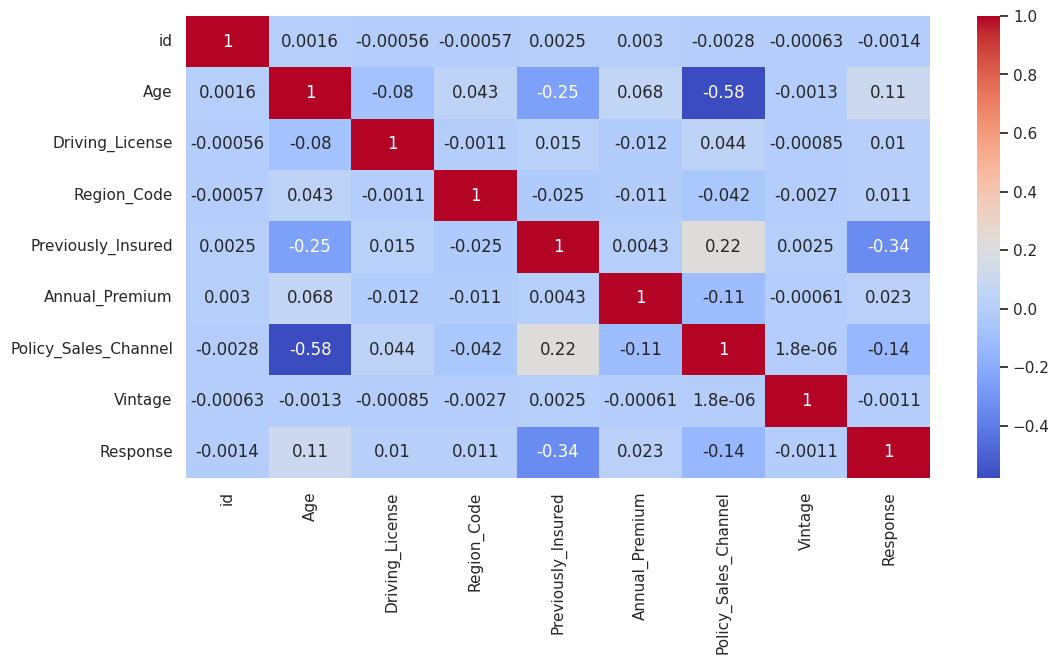

In [116]:
corr_df = insurance_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)
plt.show()

* Previously insured have correlation with dependent variable and Policy Sales Channel. Age is negatively correlated with Policy Sales Channel and Previously insured.

## ***5. Feature Engineering & Data Pre-processing***

### **1. Handling Missing Values**

In [117]:
insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age_Group               0
dtype: int64

* We user .isna() to check missing values and sum() to check the number of missing Values. There are zero missing values.

### **2. Handling Outliers**

In [118]:
# Handling outliers in Annual_Premium
Q1=insurance_df['Annual_Premium'].quantile(0.25)
Q3=insurance_df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Q1,',',Q3)
print(IQR)
print(Lower_Whisker,',',Upper_Whisker)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
insurance_df['Annual_Premium'] = np.where(insurance_df['Annual_Premium']>Upper_Whisker, Upper_Whisker, insurance_df['Annual_Premium'])


24405.0 , 39400.0
14995.0
1912.5 , 61892.5


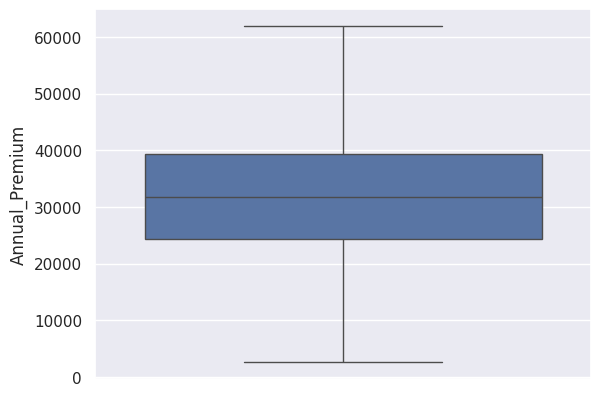

In [119]:
sns.boxplot(insurance_df['Annual_Premium'])
plt.show()

* There were many outliers in Annual_Premium. Using IOR method, We keep Annual Premium under Upper_Whisker(61892.5) and remove all outliers.

* From the above plots we can see that there are no more outliers in Annual Premium.

### **3. Categorical Encoding**


In [120]:
#changing categorical value to numerical values
cols_to_encode = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Age_Group']
insurance_df = pd.get_dummies(data = insurance_df, columns=cols_to_encode)
insurance_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Age_Group_Middle_Age,Age_Group_Old_Age,Age_Group_Young_Age
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1,1,0,0
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1,1,0,0
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0,0,0,1
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0,0,0,1


* We used .get_dummies() on the object features to change them to numerical int features.

### **4. Multicollinearity**

* Multicollinearity is a phenomenon in multiple linear regression where two or more predictor variables in a model are highly correlated.

* In other words, it's a situation where there is a linear relationship between two or more independent variables.

* This can cause issues in the model estimation process and can lead to unreliable results and interpretations.

In [121]:
int_df = insurance_df[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']]

# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [122]:
calc_vif(int_df[[i for i in int_df.describe().columns if i not in ['Response','id']]])

,variables,VIF
0,Age,10.451963
1,Driving_License,35.882484
2,Region_Code,4.953917
3,Previously_Insured,1.986897
4,Annual_Premium,4.817380
5,Policy_Sales_Channel,7.755323
6,Vintage,4.373194


In [123]:
calc_vif(int_df[[i for i in int_df.describe().columns if i not in ['Response','id','Driving_License']]])

,variables,VIF
0,Age,5.161411
1,Region_Code,4.469044
2,Previously_Insured,1.924678
3,Annual_Premium,4.271015
4,Policy_Sales_Channel,4.089496
5,Vintage,4.019734


* There is high multicollinearity VIF with the Driving_License in our data. So, We can remove Driving_license for ML models.

### **4. Feature Manipulation and Selection**

* There are many unwanted feature in dataset and they cause overfitting in model so that we will check feature importance and and drop unwanted feature.

* **Feature Manipulation**

<ipython-input-124-9b0e9603b304>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


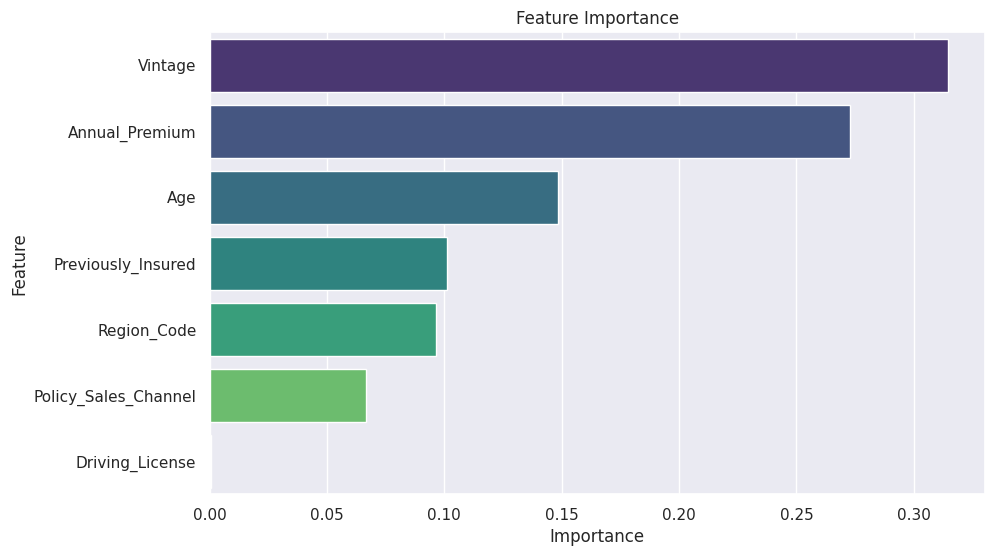

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

X = insurance_df[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]
y = insurance_df['Response']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

* **Feature Selection**

* We can remove less important features from the data set like Driving_License , Gender and id

In [125]:
# Manipulate Features to minimize feature correlation and create new features
# defining dependent variable
dep_var = 'Response'

# defining independent variable
indep_var = insurance_df.columns.drop(['Driving_License','id','Response','Gender_Female', 'Gender_Male'])

In [126]:
insurance_df.columns.drop(['Driving_License','id','Response','Gender_Female', 'Gender_Male'])

Index(['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'Age_Group_Middle_Age', 'Age_Group_Old_Age',
       'Age_Group_Young_Age'],
      dtype='object')

* **Assigning Variable in split dataset**

In [127]:
# Creating the data of independent variables
X = insurance_df[indep_var]

# Creating the dependent variable data
y = insurance_df[dep_var]

### **5. Handling Imbalanced Dataset**

* **RandomOverSampler** When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

In [128]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns

random_sampler = RandomOverSampler()
X_train_resampled, y_train_resampled = random_sampler.fit_resample(X, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_resampled)))


Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


* **The dataset has now been balanced using the over_sampling SMOTE technique, and it is ready for training the model.**

### **6. Data Splitting**

In [129]:
#dividing the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=.30, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(468158, 14) (200640, 14) (468158,) (200640,)


## ***6. ML Model Implementation***

## **ML Model  1 - Logistic Regression**

In [130]:
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
y_train_pred = logistic_regression_classifier.predict(X_train)

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)

# Predict the labels for the test set
y_pred_lr = logistic_regression_classifier.predict(X_test)

# Calculate accuracy for test data
accuracy_test = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", accuracy_test)

# Classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_lr))


Training Accuracy: 0.7840130895979562
Test Accuracy: 0.7834429824561403
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100328
           1       0.70      0.98      0.82    100312

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



**ROC Curve**

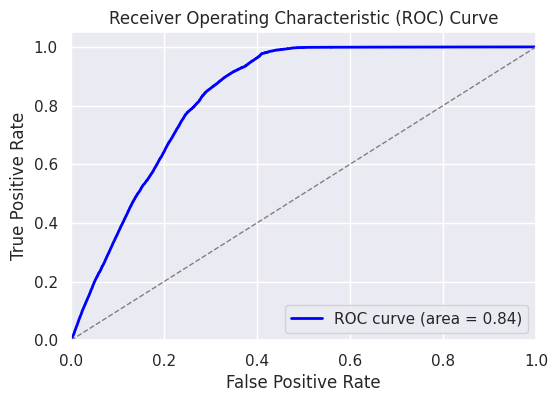

In [131]:
# Get the predicted probabilities for the positive class
y_prob = logistic_regression_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


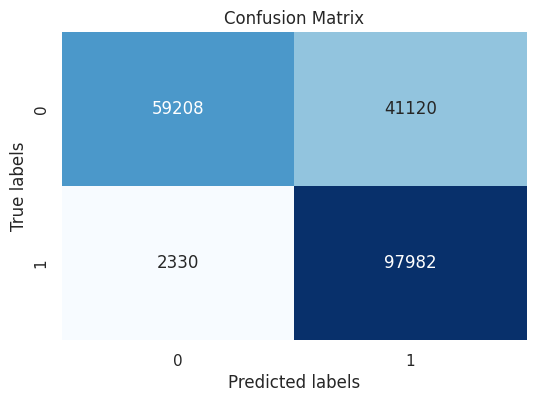

In [132]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## **ML Model  2 - DecisionTreeClassifier**

In [133]:
# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)
y_train_pred = decision_tree_classifier.predict(X_train)

# Predict the labels for the test set
y_pred_tree = decision_tree_classifier.predict(X_test)

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)

# Calculate accuracy for test data
accuracy_test = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Training Accuracy: 0.999765036590211
Accuracy: 0.9362340510366827
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    100328
           1       0.89      1.00      0.94    100312

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



**ROC Curve**

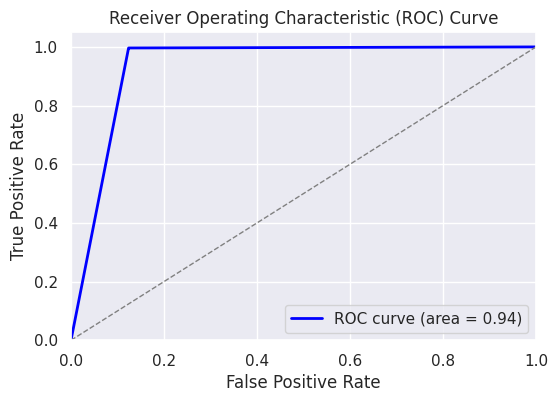

In [134]:
# Get the predicted probabilities for the positive class
y_prob = decision_tree_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


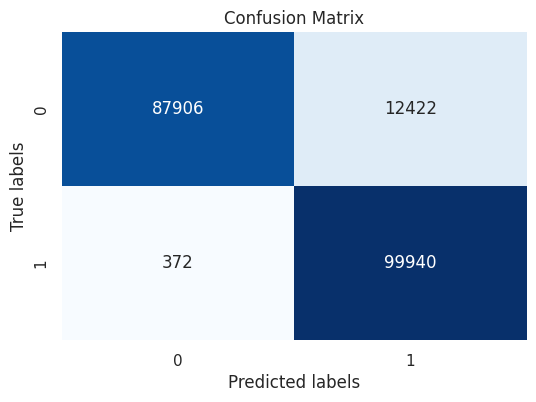

In [135]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **ML Model  3 - RandomForest Classifier**

In [136]:
# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Train the classifier on the training data
random_forest_classifier.fit(X_train, y_train)
y_train_pred = random_forest_classifier.predict(X_train)

# Predict the labels for the test set
y_pred_forest = random_forest_classifier.predict(X_test)

# Accuracy
# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))


Training Accuracy: 0.999765036590211
Accuracy: 0.9386363636363636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    100328
           1       0.89      1.00      0.94    100312

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



**ROC Curve**

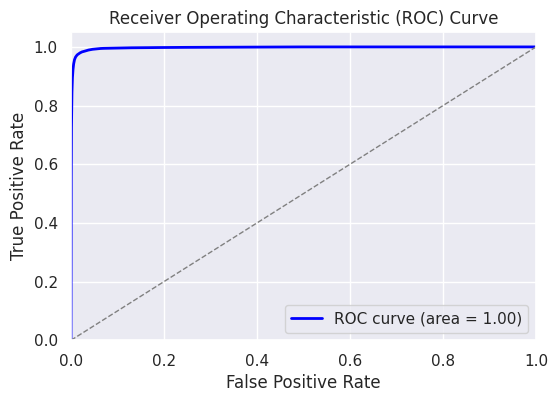

In [137]:
# Get the predicted probabilities for the positive class
y_prob = random_forest_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


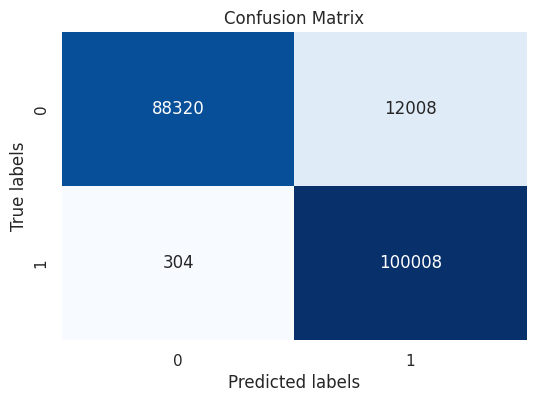

In [138]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **ML Model  4 - KNNeighbors Classifier**

In [139]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)
y_train_pred = knn_classifier.predict(X_train)


# Predict the labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Accuracy
# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Training Accuracy: 0.8958321763165427
Accuracy: 0.8547149122807017
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.84    100328
           1       0.79      0.96      0.87    100312

    accuracy                           0.85    200640
   macro avg       0.87      0.85      0.85    200640
weighted avg       0.87      0.85      0.85    200640



**ROC Curve**

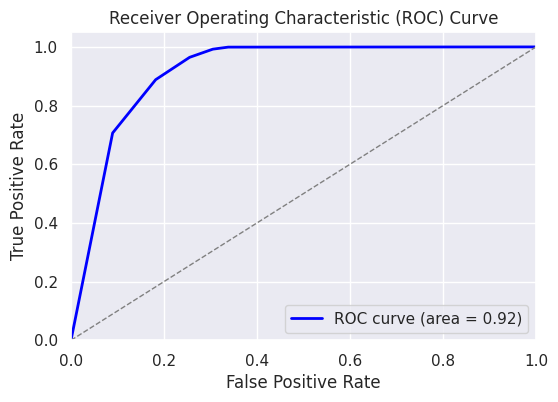

In [140]:
# Get the predicted probabilities for the positive class
y_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


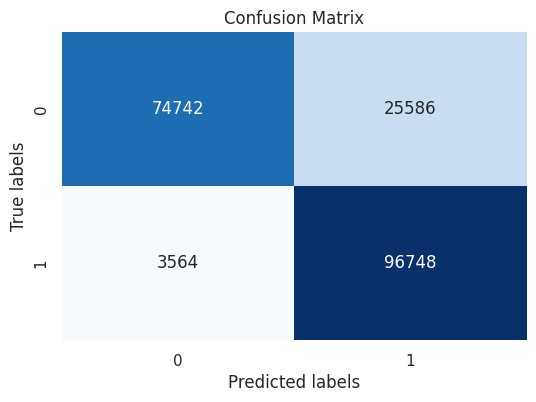

In [141]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **ML Model  5 - GaussianNB Classifier**

In [142]:
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)
y_train_pred = naive_bayes_classifier.predict(X_train)

# Predict the labels for the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Training Accuracy: 0.7842031963567855
Accuracy: 0.7836273923444976
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100328
           1       0.70      0.98      0.82    100312

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



**ROC Curve**

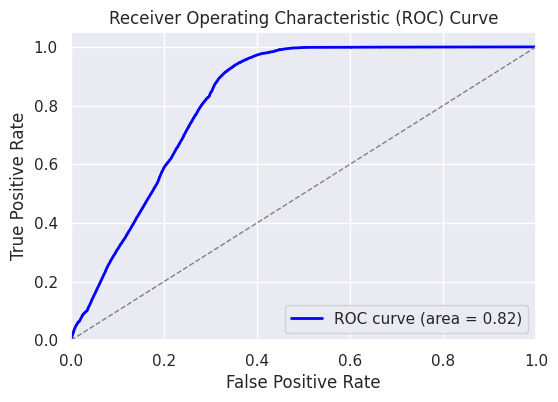

In [143]:
y_prob = naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


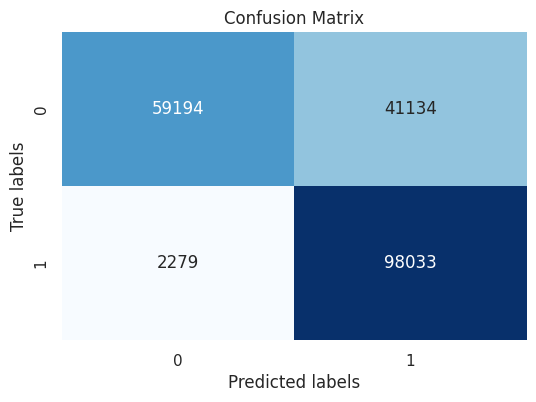

In [144]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **ML Model  6 - GradientBoosting Classifier**

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)
y_pred_gb = gradient_boosting_classifier.predict(X_test)

# Accuracy
# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Training Accuracy: 0.7842031963567855
Accuracy: 0.7970693779904306
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77    100328
           1       0.74      0.93      0.82    100312

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.79    200640
weighted avg       0.82      0.80      0.79    200640



**ROC Curve**

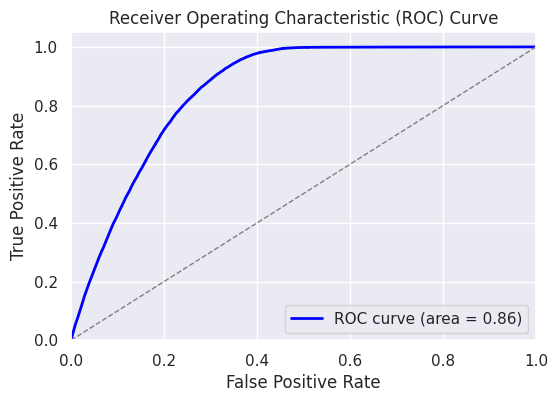

In [146]:
# Get the predicted probabilities for the positive class
y_prob = gradient_boosting_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


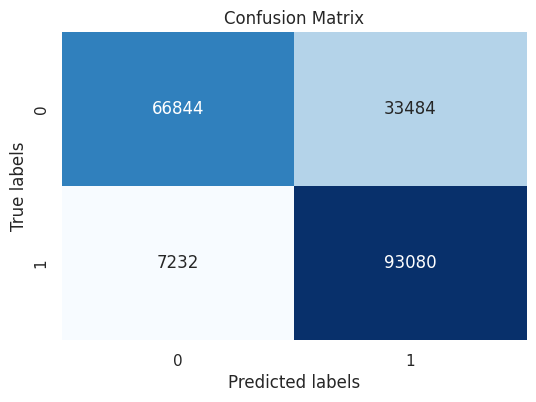

In [147]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **ML Model  7 - XGB Classifier**

In [148]:
# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_cv = best_model.predict(X_test)

# Evaluate the classifier
accuracy_xgb = accuracy_score(y_test, y_pred_cv)
print("Accuracy:", accuracy_xgb)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_cv))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cv))


Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 30}
Best Score: 0.8098782851569724
Accuracy: 0.8088317384370016
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78    100328
           1       0.75      0.94      0.83    100312

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.81    200640
weighted avg       0.83      0.81      0.81    200640

Confusion Matrix:
[[68380 31948]
 [ 6408 93904]]


**ROC Curve**

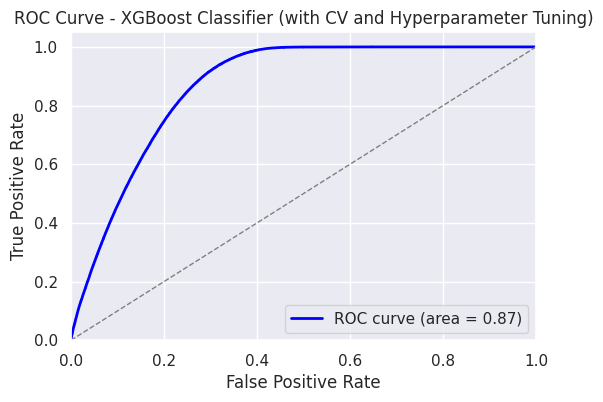

In [149]:
y_probas_cv = cross_val_predict(best_model, X_train, y_train, cv=cv, method="predict_proba")

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_train, y_probas_cv[:, 1])
roc_auc = roc_auc_score(y_train, y_probas_cv[:, 1])

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier (with CV and Hyperparameter Tuning)')
plt.legend(loc="lower right")
plt.show()


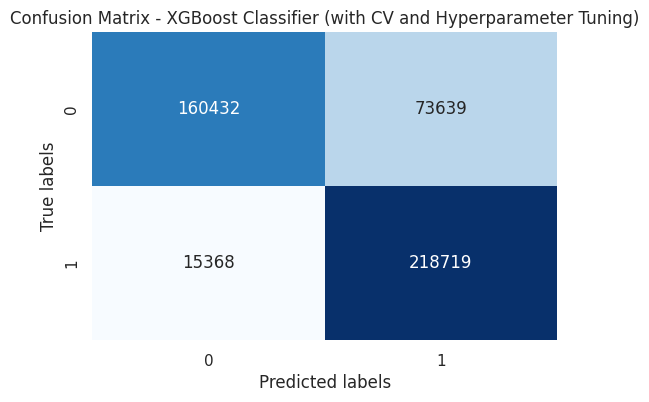

In [150]:
y_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=cv)

# Compute confusion matrix
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost Classifier (with CV and Hyperparameter Tuning)')
plt.show()


## **ML Model  8 - SVM Classifier**

In [155]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the classifier on a subset of the training data
subset_size = 50
X_train_subset, y_train_subset = X_train[:subset_size], y_train[:subset_size]
svm_classifier.fit(X_train_subset, y_train_subset)

# Predict the labels for the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.7669557416267943
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72    100328
           1       0.70      0.92      0.80    100312

    accuracy                           0.77    200640
   macro avg       0.80      0.77      0.76    200640
weighted avg       0.80      0.77      0.76    200640



**ROC Curve**

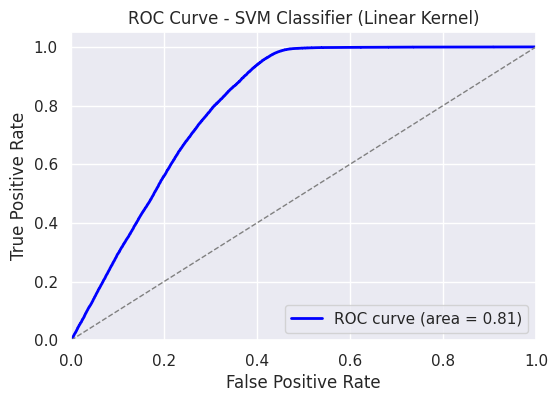

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for positive class
y_probs_svm = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svm)
roc_auc = roc_auc_score(y_test, y_probs_svm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier (Linear Kernel)')
plt.legend(loc="lower right")
plt.show()


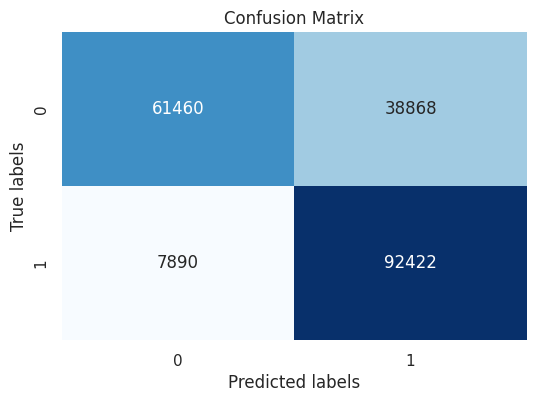

In [153]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

****

# **Conclusion**

### **Comparing Metrics for all Models**

XGBoost classifier is not fitted. Skipping...
SVM classifier is not fitted. Skipping...


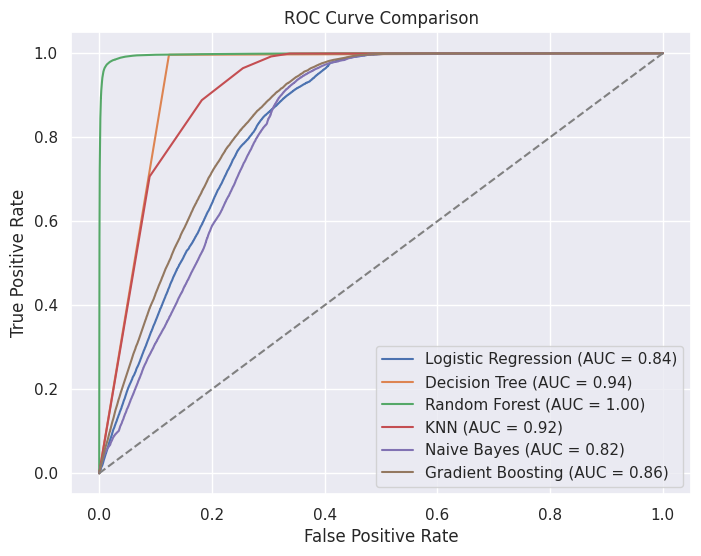

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.exceptions import NotFittedError

# Define lists to store FPR, TPR, and AUC for each model
fpr_list = []
tpr_list = []
auc_list = []

# Define the list of classifiers and their corresponding names
classifiers = [logistic_regression_classifier, decision_tree_classifier, random_forest_classifier, knn_classifier, naive_bayes_classifier, gradient_boosting_classifier, xgb_classifier, svm_classifier]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'XGBoost', 'SVM']

# Iterate over each classifier
for classifier, name in zip(classifiers, classifier_names):
    try:
        # Check if the classifier is fitted
        if not hasattr(classifier, 'predict_proba'):
            raise NotFittedError
        # Compute predicted probabilities for positive class
        y_probs = classifier.predict_proba(X_test)[:, 1]
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)
        # Store FPR, TPR, and AUC
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        auc_list.append(auc)
    except NotFittedError:
        print(f"{name} classifier is not fitted. Skipping...")

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
for fpr, tpr, auc, name in zip(fpr_list, tpr_list, auc_list, classifier_names):
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


* After loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required.
* Our dataset was imbalanced ao that with the help of Oversampling Standerized the dataset.
* Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process ML algorithms.
* For Feature Selection, We used feature imortance and we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the numeric features.
* Next we implemented nine machine learning algorithms namely, 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'XGBClassifier', 'SVMClassifier'.
* We did hyperparameter tuning into improve our models performance. The 'RandomForestClassifier', 'XGBClassifier', 'GBClassifier' models are best performing models with test accuracy score of 90 but we have an imbalance dataset, So we have to consider precision and recall and roc_auc score as well, accuracy alone can be misleading.

**Key points:**


* Customers of age between 30 to 60 are more likely to buy insurance.

* Customers with Vehicle_Damage are likely to buy insurance.

* Customers with Driving License have higher chance of buying Insurance.

* The variable Vehicle_damage, Age, Previously_insured, Annual_premium are affecting the target variable.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***